# Making Business Decisions Based on Data (A/B tests)

Analytic department of company, a big online store, prepared a list of hypotheses that may help boost revenue.
We will prioritize these hypotheses, and then we'll launch an A/B test and analyze the results. 

## Studying general information

In [1]:
# importing libraries

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels as st
from scipy.stats import mannwhitneyu
from IPython.display import display
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
# importing datasets

try:
    visits = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/AB tests/datasets/visits_us.csv')
    orders = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/AB tests/datasets/orders_us.csv')
    hypotheses = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/AB tests/datasets/hypotheses_us.csv', sep=';')

except: 
    visits = pd.read_csv('/datasets/visits_us.csv')
    orders = pd.read_csv('/datasets/orders_us.csv')
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')


In [3]:
# looking at the general information on 'visits' dataset
display(visits.head(10))
display(visits.sample(10))
display(visits.tail(10))

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


,date,group,visits
61,2019-08-31,B,718
53,2019-08-23,B,546
29,2019-08-30,A,490
46,2019-08-16,B,413
18,2019-08-19,A,502
59,2019-08-29,B,531
35,2019-08-05,B,707
54,2019-08-24,B,378
11,2019-08-12,A,595
57,2019-08-27,B,720


,date,group,visits
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [5]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [6]:
visits['group'].describe()

count     62
unique     2
top        A
freq      31
Name: group, dtype: object

In [7]:
# checking if 'group' identifiers are only A and B

visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [8]:
# looking at the general information on 'orders' dataset

display(orders.head(10))
display(orders.sample(10))
display(orders.tail(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


,transactionId,visitorId,date,revenue,group
950,627172106,3074968175,2019-08-21,375.6,B
1045,1076322816,2219162270,2019-08-11,95.2,A
204,1935539409,3836897869,2019-08-17,105.1,B
878,3315359627,1831956319,2019-08-05,5.4,A
898,1035705992,1396482013,2019-08-21,270.2,B
369,4041036714,978473912,2019-08-24,195.8,B
896,4100162122,2736682487,2019-08-21,25.9,A
463,4170537404,290022471,2019-08-19,255.5,B
220,2674236505,2476105225,2019-08-23,40.2,B
943,1215018444,2406897935,2019-08-08,285.3,B


,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,15.5,A
1188,1692103379,1022829655,2019-08-14,5.7,A
1189,4082620617,393266494,2019-08-14,490.4,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
# checking if there are users with more than 1 group identifier

users_wrong_group = orders.groupby('visitorId').agg({'group':'nunique'}).query('group > 1')
users_wrong_group.head(10)

,group
visitorId,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2
351125977,2
393266494,2
457167155,2
471551937,2


In [11]:
# calculating the number of users with wrong group identifiers
users_wrong_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 8300375 to 4266935830
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   group   58 non-null     int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [12]:
# checking if 'transactionId' values are all unique

len(orders['transactionId'].unique())

1197

In [13]:
# checking if 'group' identifiers are only A and B

orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [14]:
# checking 'revenue' values in 'orders' table

orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

In [15]:
# printing the full hypotheses' texts

for i in range(0,8):
    print('Hypothesis', i+1, ':', hypotheses.iloc[i]['Hypothesis'])
    display(hypotheses.iloc[i][['Reach', 'Impact', 'Confidence', 'Effort']])

Hypothesis 1 : Add two new channels for attracting traffic. This will bring 30% more users


Reach          3
Impact        10
Confidence     8
Effort         6
Name: 0, dtype: object

Hypothesis 2 : Launch your own delivery service. This will shorten delivery time


Reach          2
Impact         5
Confidence     4
Effort        10
Name: 1, dtype: object

Hypothesis 3 : Add product recommendation blocks to the store's site. This will increase conversion and average purchase size


Reach         8
Impact        3
Confidence    7
Effort        3
Name: 2, dtype: object

Hypothesis 4 : Change the category structure. This will increase conversion since users will find the products they want more quickly


Reach         8
Impact        3
Confidence    3
Effort        8
Name: 3, dtype: object

Hypothesis 5 : Change the background color on the main page. This will increase user engagement


Reach         3
Impact        1
Confidence    1
Effort        1
Name: 4, dtype: object

Hypothesis 6 : Add a customer review page. This will increase the number of orders


Reach         3
Impact        2
Confidence    2
Effort        3
Name: 5, dtype: object

Hypothesis 7 : Show banners with current offers and sales on the main page. This will boost conversion


Reach         5
Impact        3
Confidence    8
Effort        3
Name: 6, dtype: object

Hypothesis 8 : Add a subscription form to all the main pages. This will help you compile a mailing list


Reach         10
Impact         7
Confidence     8
Effort         5
Name: 7, dtype: object

Checking for duplicates

In [16]:
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

### Conclusion

We have found the following issues with the datasets.

A. Inappropriate format of values:

The values 'date' column in 'visits' and 'orders' tables are dates, but the format of these values is 'object', so it should be converted into 'DateTime' format. 
 

B. Wrong 'group' identifiers: 

58 visitors listed in the 'orders' table have both 'A' and 'B' group identifiers. This is not correct, the users shall be either 'A' or 'B'. This issue may be result of a error when  collecting/exporting the data. We need to get rid of these visitors, so that they would not affect the results of analysis. 

## Data preprocessing

#### Preprocessing 'visits' table

In [18]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# converting values of 'date' column to DateTime format

visits['date'] = pd.to_datetime(visits['date'], format = '%Y-%m-%d')

In [20]:
# checking the results
display(visits.head())
visits.info()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Preprocessing 'orders' table

In [21]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [22]:
# changing names of the columns to facilitate the further processing

orders = orders.rename(columns = 
                       {'transactionId':'transaction_id', 
                        'visitorId':'visitor_id' 
                        }, inplace = False)

In [23]:
# converting values of 'date' column to DateTime format

orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [24]:
# getting rid of rows with visitors with more than one group identifier 

orders = orders[~orders.visitor_id.isin(users_wrong_group.index)]
orders = orders.reset_index()

In [25]:
# checking the results

display(orders.info())
display(orders.head())
display(orders.groupby('visitor_id').agg({'group':'nunique'}).query('group > 1'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           1016 non-null   int64         
 1   transaction_id  1016 non-null   int64         
 2   visitor_id      1016 non-null   int64         
 3   date            1016 non-null   datetime64[ns]
 4   revenue         1016 non-null   float64       
 5   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 47.8+ KB


None

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B


,group
visitor_id,


### Conclusion

1. We have converted the values related to dates  of both 'visits' and 'orders' tables into DateTime.  
2. We  got rid of the rows in 'orders' table related to visitors with two group identifiers. The total number of such rows are 181 of 1197, so it is about 10%, a relatively large volume, but we need to do this, as these values corrupt the data and we would have got the wrong results. 

## Analysis

### Part I.  Prioritizing Hypotheses

In [26]:
# checking 'hypotheses' table
pd.set_option('max_colwidth', 400)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


####  Applying the ICE framework to prioritize hypotheses. Sort them in descending order of priority

In [27]:
# calculating ICE score for each of the hypotheses

hypotheses['ICE'] = (hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

hypotheses.sort_values(by = 'ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


The first five hypotheses are 8, 0, 7, 6, 2. 

#### Applying the RICE framework to prioritize hypotheses. Sort them in descending order of priority

In [28]:
# calculating RICE score for each of the hypotheses

hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

hypotheses.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


The first five hypotheses are 7, 2, 0, 6, 8

### Conclusions (show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes)

The first five hypotheses are the same according to both methods of prioritization, but these hypotheses take different places (except for hypothesis number '6') when we sort them the value of the score. 

Here are the hypotheses (in numeric order): 

Hypothesis 0 : Add two new channels for attracting traffic. This will bring 30% more users

Reach          3
Impact        10
Confidence     8
Effort         6

Hypothesis 2 : Add product recommendation blocks to the store's site. This will increase conversion and average purchase size

Reach         8
Impact        3
Confidence    7
Effort        3

Hypothesis 6 : Show banners with current offers and sales on the main page. This will boost conversion

Reach         5
Impact        3
Confidence    8
Effort        3

Hypothesis 7 : Show banners with current offers and sales on the main page. This will boost conversion

Reach         10
Impact         7
Confidence     8
Effort         5

Hypothesis 8 : Launch a promotion that gives users discounts on their birthdays

Reach         1
Impact        9
Confidence    9
Effort        5


The most extreme changes in prioritization when applying different methods of priority asessment are seen in the case of Hypothesis 8 "Launch a promotion that gives users discounts on their birthdays". These hypothesis has high score of Impact and Confidence and requires a relatively medium Effort, but if we take into account the Reach parameter, we see that the potenial Reach is relatively low and its priority place shiffts from the first to the fifth place. 

The opposite examples are the Hypothesis 2 "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size" and Hypothesis 7 "Show banners with current offers and sales on the main page. This will boost conversion". It has a relatilvely low potential Impact and medium Confidence, but the potential Reach of this hypothesis is relatively high, so if we take into account the possible Reach, the  priority place changes from the 5th to the 2nd in the case of Hypothesis 2 and from the 3rd to the  1st in the case of Hypothesis 7. 

The only hypothesis whose prioritization does not change depending on method is the the Hypothesis 2 "Show banners with current offers and sales on the main page. This will boost conversion". This reason is that the Reach is relatively medium, so it does not affect the prioritization. 

And finally the Hypothesis  0 "Add two new channels for attracting traffic. This will bring 30% more users" is in the middle in the both cases (the 2nd, where we don't take into account the Reach and the 3rd if we take it into account). The reason is that this hypothesis has a high estimated Impact and medium Effort score. So, even if the Reach is not high, this hypothesis may by considered as hypothesis with a relatively high priority in two cases.  

### Part II. A/B Test Analysis

####  Graph cumulative revenue by group. Make conclusions and conjectures.

In [29]:
orders.head()

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B


In [30]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [31]:
# creating a dataset with dates and groups
datesGroups = orders[['date','group']].drop_duplicates() 

In [32]:
# agrregating the data on order 
# by creating a separate dataset based on the dataframe with dates and groups
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                           orders['group'] == x['group'])]
                           .agg(
                               {'date' : 'max',
                                'group':'max',
                                'transaction_id' : pd.Series.nunique, 
                                'visitor_id' : pd.Series.nunique, 
                                'revenue' : 'sum'}),
                           axis=1)
                    .sort_values(by=['date','group'])
                   )

In [33]:
# checking the results
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
45,2019-08-01,A,23,19,2266.6
54,2019-08-01,B,17,17,967.2
149,2019-08-02,A,42,36,3734.9
147,2019-08-02,B,40,39,3535.3
245,2019-08-03,A,66,60,5550.1


In [34]:
# making another dataset with aggregated data on visits 

visitsAggregated = (datesGroups
                      .apply(lambda x: 
                             visits[np.logical_and(visits['date'] <= x['date'], 
                                                     visits['group'] == x['group'])]
                             .agg({'date' : 'max', 
                                   'group' : 'max', 
                                   'visits' : 'sum'}), 
                             axis=1)
                      .sort_values(by=['date','group'])
                     )
visitsAggregated.head()

,date,group,visits
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845


In [35]:
# merging the two tables into one and changing columns names

cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# checking the results

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [36]:
# creating subsets with cumulative orders and cumulative revenue by day, group A and group B

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

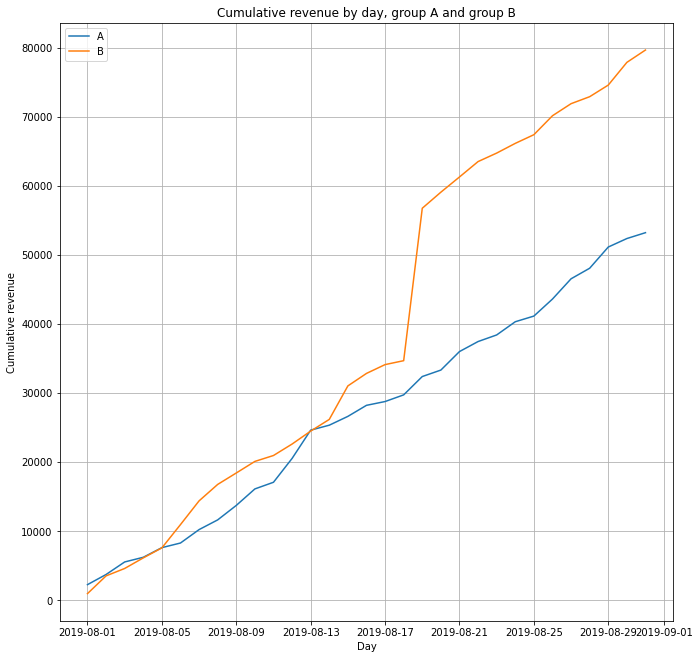

In [37]:
# plotting a graph showing the cumulative revenue by day for group A and group B 

plt.figure(figsize=(11, 11))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title ("Cumulative revenue by day, group A and group B") 
plt.xlabel("Day")
plt.ylabel("Cumulative revenue")
plt.grid()
plt.show()

We see that the revenue is growing in two cases: users from two group continue to bring income to the company. But we cannot say which group is more effective in terms of revenue: 
1. During the first 18 days the trend was not clear: sometimes the revenue from B group was higher, sometimes the revenue from A group was higher, 
2. During the period from August 19 - August 20  there were some very high volume orders from B users,  so the cumulative income from the group B was higher since then. But we see that the trend of the income growth from the group B is very similar to thos of the group A, they both grow almost equally. So these big orders are outliers, and therefore it looks like the income from two groups do not differ.  

#### Graph cumulative average order size by group. Make conclusions and conjectures.

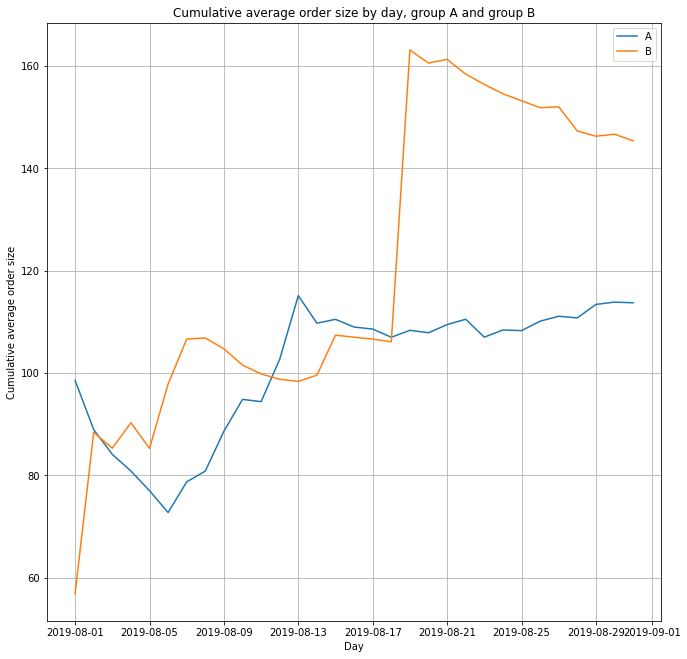

In [38]:
# plotting a graph showing the cumulative average order size by day for group A and group B 

plt.figure(figsize=(11, 11))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title ("Cumulative average order size by day, group A and group B") 
plt.xlabel("Day")
plt.ylabel("Cumulative average order size")
plt.grid()
plt.show()

We see that cumulative average order size was not stable in both cases: 

1. The cumulative average order size of group B was growing at the first phase of the experiment, then it drastically raised after some huge orders during the period from August 19 - August 20. And finally after these huge orders the average  order size was declining.
2. At the same time the average order size of the group A was first declining, then after August 9 and till August 14 it was rising, and it was since then stabilizing with a slight trend to grow. 

As we cannot say that the average order size was stabilized, we cannot make conclusion on difference in order size between to groups. 


#### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

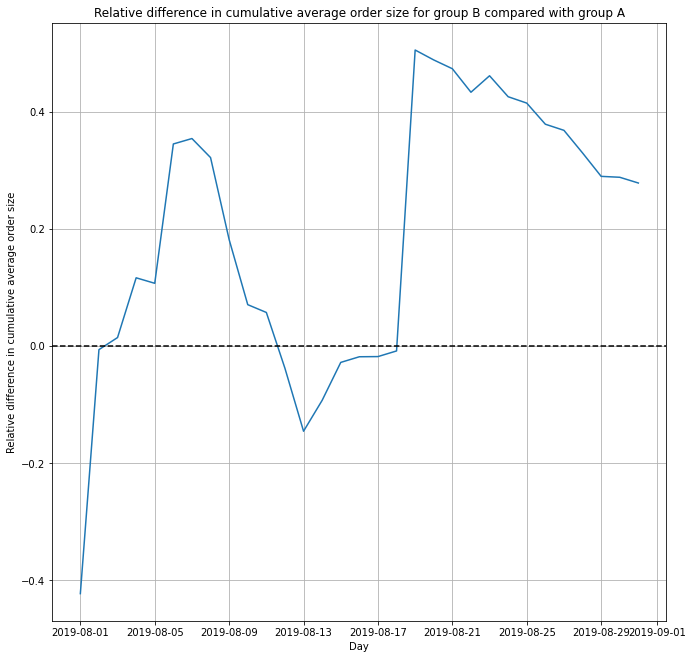

In [39]:
# creating a dataset with cumulative revenue and orders by day by merging to datasets 

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes

plt.figure(figsize=(11, 11))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.title ("Relative difference in cumulative average order size for group B compared with group A") 
plt.xlabel("Day")
plt.ylabel("Relative difference in cumulative average order size")
plt.grid()
plt.show()

The relative difference was not stable during the experiment, it first raised (up to August 9), then declined (up to August 14), then once again raised (up to August 20), but finally it's been declining since then. Hence as it was not stabilized, we cannot figure out if there any difference and what it is, if any. 

#### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

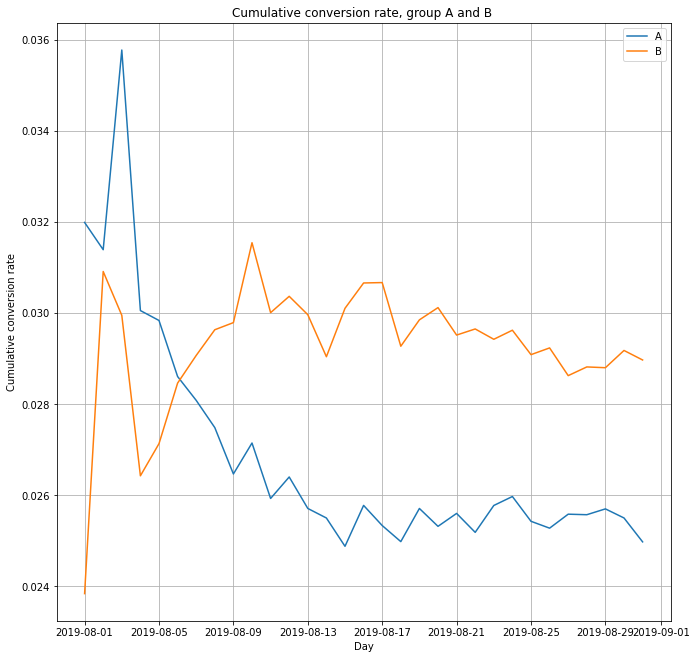

In [40]:
# calculating cumulative conversion

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# creating subsets with data related to group A and group B

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs

plt.figure(figsize=(11, 11))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title ("Cumulative conversion rate, group A and B ") 
plt.xlabel("Day")
plt.ylabel("Cumulative conversion rate")
plt.legend()
plt.grid()
plt.show()

We see that the conversion rate within two groups was instable during the first phase of the experiment: 
1. The conversion rate within the group B  was growing, then declining, and then was rising once aagin  and was lower than the converstion rate withing the group A until August 6,
2. The conversion rate within the group A after a good start was on decline and after August 6 was never higher than the conversion rate of the other group. 

We also can say that the conversion rate within both group tends to slightly decline at the end of the experiment, but we see that the conversion rate within the group B is higher than those within the group A. 

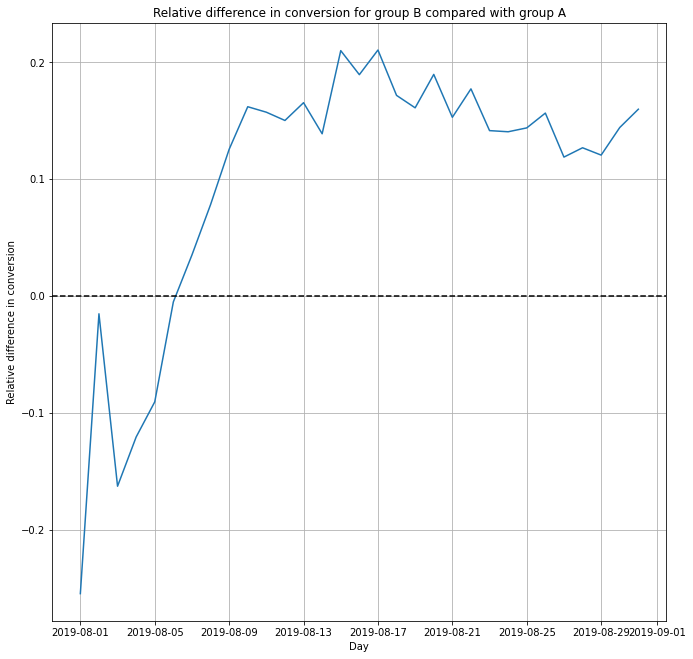

In [41]:
# creating a dataset with cumulative conversion by creating two datasets related to different groups
# and then merging them to make it easier to calculate 

cumulativeConversionA = cumulativeData[cumulativeData['group']=='A'][['date','conversion']]
cumulativeConversionB = cumulativeData[cumulativeData['group']=='B'][['date','conversion']]
mergedCumulativeConversion = cumulativeConversionA.merge(cumulativeConversionB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# plotting a relative difference in conversion graph 

plt.figure(figsize=(11, 11))
plt.plot(mergedCumulativeConversion['date'], 
         ((mergedCumulativeConversion['conversionB']/mergedCumulativeConversion['conversionA'])
         -1))

plt.axhline(y=0, color='black', linestyle='--')

plt.title ("Relative difference in conversion for group B compared with group A") 
plt.xlabel("Day")
plt.ylabel("Relative difference in conversion")
plt.grid()
plt.show()

We see that the relative difference in conversion rate has grown during the experiment. There are some fluctuations, but the main trend is that the conversion of the group is better than those of the group A.  

#### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [42]:
orders.head()

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B


In [43]:
# creating a subset with a number of orders by users
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date', 'index'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

# changing columns names
ordersByUsers = ordersByUsers.rename(columns = 
                       {'transaction_id':'n_orders'}, inplace = False)

# looking at the results
ordersByUsers.sort_values(by='n_orders', ascending=False).head(15)

,visitor_id,n_orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


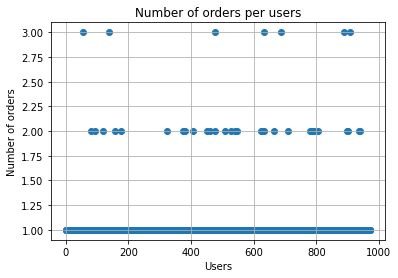

In [44]:
# plotting a scatterplot showing the distribution of number of orders per user

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['n_orders']) 
plt.title ("Number of orders per users") 
plt.xlabel("Users")
plt.ylabel("Number of orders")
plt.grid()
plt.show()

We see that the most common case is a one order per user, a more rare case is two order orders per user and the rarest case is three orders per user. The users with three and two orders might give some noise to the data, so the the peaks in the cumulative conversion rate that we saw in the previous graph may be explained by such users.   

#### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [45]:
# calculating the percentiles of number of orders
print(np.percentile(ordersByUsers['n_orders'], [95, 99]))

[1. 2.]


So for 95% of users is the most common case is 1 order per users, and only the rest 5% of users  made 2 or 3 orders. So we would say that more than 1 order is already an anomaly

#### Plot a scatter chart of order prices. Make conclusions and conjectures.

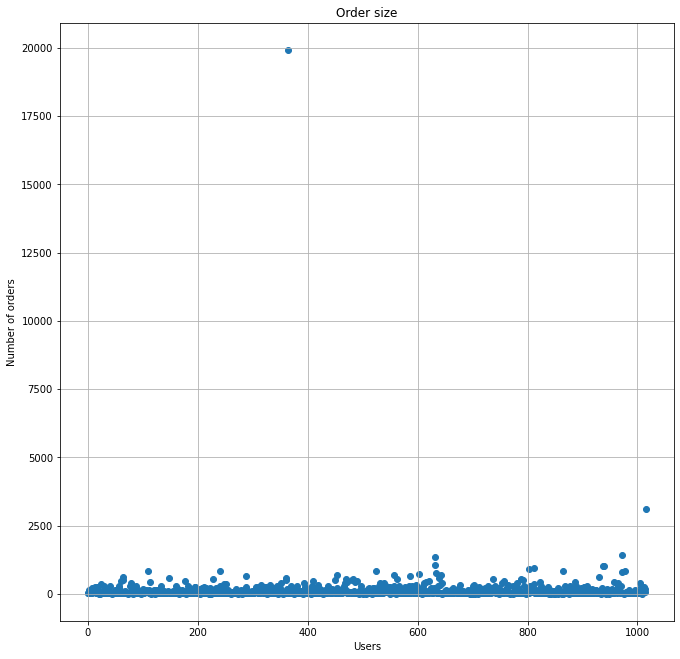

In [46]:
# plotting a scatter plot showing the distribution of revenue per order values
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(11, 11))
plt.scatter(x_values, orders['revenue']) 
plt.grid()
plt.title ("Order size") 
plt.xlabel("Users")
plt.ylabel("Number of orders")
plt.show()

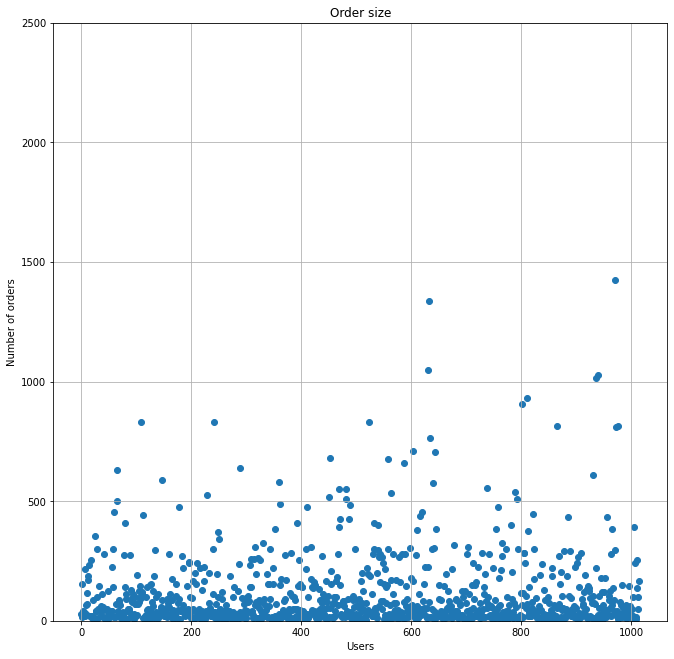

In [47]:
# zooming in scatter plot by setting up a 'y' limit to 2500

plt.figure(figsize=(11, 11))
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0, 2500)
plt.grid()
plt.title ("Order size") 
plt.xlabel("Users")
plt.ylabel("Number of orders")
plt.show()

We see that the in the most of the cases the order size was under 500 and even much lower on average (about 100-200). 

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [48]:
# calculating the percentiles of revenue per order 
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


We see that  95 % of purchses were under 414.275, and only 5 % of others were a larger purchase, so we would say that even a puchase above 414.275 was anomaly.  

####  Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [49]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [50]:
# making samples with data on orders related to 2 groups

ordersByUsersA = (orders[orders['group']=='A']
                  .groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique})
                 )
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (orders[orders['group']=='B']
                  .groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique})
                 )
ordersByUsersB.columns = ['visitor_id', 'orders'] 



sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], 
                     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')], axis=0)

Once we made two samples, we formulate the Hypothesis 0 as "sample distributions are equal", and  Hypothesis 1 as "sample distributions are different. 

We have chosen "standard" 0.05 alpha in order to avoid Error Type I or Error Type II.

In [51]:
# finding statistical significance using MannWhitney test 

# comparing samples
stat, p = mannwhitneyu(sampleA, sampleB)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=176468368.000, p=0.00551
Different distribution (reject H0)


So the result of the test show that there is statistical signifance in the conversion rate values distributions and we have no ground to reject the hypothesis, that the conversion rates within two groups really differ.  

#### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [52]:
# creating samples of data on revenue per user for each group

sample_rev_A = orders[orders['group']=='A']['revenue']

sample_rev_B = orders[orders['group']=='B']['revenue']


Again, after making two samples containing revenue values, as in the previous case we formulate the zero Hypothesis as the "samples distributions are equal" and the opposite as they are the same.  

In [53]:
# comparing samples
stat, p = mannwhitneyu(sample_rev_A, sample_rev_B)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=127422.500, p=0.43112
Same distribution (fail to reject H0)


We see that according to the results of the test we have no ground to conclude that the distributions re different, so there is no statistical significance in the difference of the average order size within two groups.

#### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [54]:
# creating a subset fith visitor ids of abnormal users

usersWithManyOrders = ordersByUsers[ordersByUsers['n_orders']>1]['visitor_id']
usersWithExpensiveOrders = orders[orders['revenue'] > 415]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
# checking the results
display(abnormalUsers.head(5))
print(abnormalUsers.shape) 

487    113298937
937    148427295
792    204675465
55     249864742
586    358944393
Name: visitor_id, dtype: int64

(86,)


In [55]:
# creating samples filtered from abnormal users 

sampleAFiltered = pd.concat([ordersByUsersA
                             [np.logical_not(
    ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(
                                 visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB
                             [np.logical_not(
                                 ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(
                                 visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)

We have filtered the data from the outliers and formed two samples based on it. We applied the same logique when formulating the hypothesis. 

In [56]:
# finding statistical significance using MannWhitney test 

# comparing samples
stat, p = mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=175730625.000, p=0.00797
Different distribution (reject H0)


We see that the p-value has grown after filtering the data from the noise, but the results of the test is the same as in the case of the raw data: the distributions are different, so there is a statistical significance in the difference between conversion rate within two groups. 

#### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [57]:
# creating samples with data on revenue per order for group

sample_rev_filt_A = orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']

sample_rev_filt_B = orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']


We made the same thing with the data related to revenue from each order: we created two samples based on the filtered the data  and applied the same logique when formulating the two hypotheses. 

In [58]:
# finding statistical significance using MannWhitney test 

# comparing samples
stat, p = mannwhitneyu(sample_rev_filt_A, sample_rev_filt_B)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=96537.000, p=0.38559
Same distribution (fail to reject H0)


The p-value has become lower in after filtering the data, but the result is still the same: we have no ground to conclude that the distributions are different, so there is no statistical significance between two groups in terms of average order size. 

### Conclusion (make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test).

We think we should stop the test and declare that the result we have gained shows us that:

1. there is a statistical significance of difference in converstion between two groups and the group B shows a better conversion (the relative difference is about 15%). So the group B is more successful  in terms of conversion.
2. there is no statistical significance of difference in average order size for two groups and we don't see any signs that it would change if we continue the test (the average order size for two groups was fluctuating and we see that in the end of experiment the trend was that the cumulative relative difference in order size was lowering, so it is very unprobable that it would change to the opposite). 